In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.rain.048001-048912.nc')

In [3]:
plotvar = data.variables['rain'][24:,0:1600,0:3600]
lont = data.variables['TLON'][0:1600,0:3600]
latt = data.variables['TLAT'][0:1600,0:3600]
averain = np.nanmean(plotvar,axis=0)

In [4]:
averain[averain ==-1]=np.nan

In [5]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.snow.048001-048912.nc')

In [6]:
plotvar = data.variables['snow'][24:,0:1600,0:3600]
lont = data.variables['TLON'][0:1600,0:3600]
latt = data.variables['TLAT'][0:1600,0:3600]
avesnow = np.nanmean(plotvar,axis=0)

In [7]:
avesnow[avesnow ==-1]=np.nan

In [8]:
t489 = averain + avesnow

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


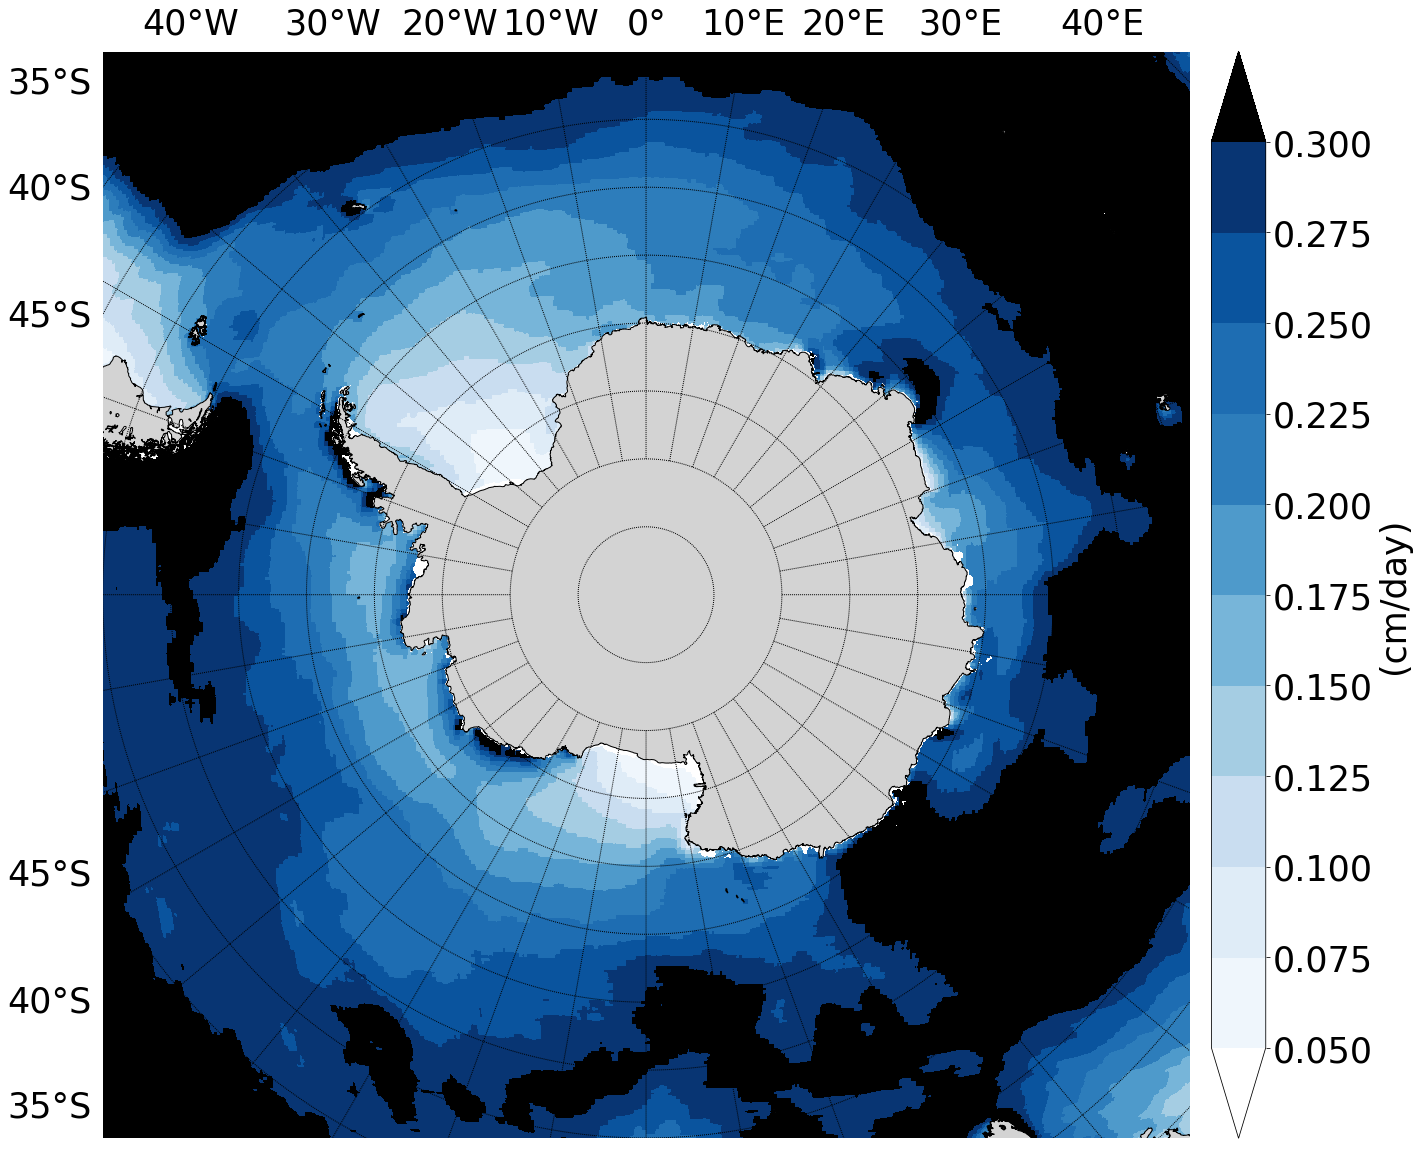

In [9]:
nice_cmap= nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap)
#nice_levels = [0.00001*3600*24*100/997,0.000012*3600*24*100/997,0.000014*3600*24*100/997,0.000016*3600*24*100/997,\
               #0.000018*3600*24*100/997,0.00002*3600*24*100/997,0.000024*3600*24*100/997,0.000026*3600*24*100/997,\
               #0.000028*3600*24*100/997,0.00003*3600*24*100/997,0.000032*3600*24*100/997]
nice_levels = [0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='white')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,t489,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('black')
CP.cmap.set_under('white')


#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)

In [10]:
data2=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.rain.047001-047912.nc')

In [11]:
plotvar = data2.variables['rain'][0:96,0:1600,0:3600]
lont = data.variables['TLON'][0:1600,0:3600]
latt = data.variables['TLAT'][0:1600,0:3600]
aveplotrian1 = np.nanmean(plotvar,axis=0)

In [12]:
aveplotrian1[aveplotrian1 ==-1]=np.nan

In [13]:
data3=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.snow.047001-047912.nc')

In [14]:
plotvar = data3.variables['snow'][0:96,0:1600,0:3600]
lont = data.variables['TLON'][0:1600,0:3600]
latt = data.variables['TLAT'][0:1600,0:3600]
aveplotsnow2 = np.nanmean(plotvar,axis=0)

In [15]:
aveplotsnow2[aveplotsnow2 ==-1]=np.nan

In [16]:
t479 = aveplotrian1 + aveplotsnow2

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'spacing'


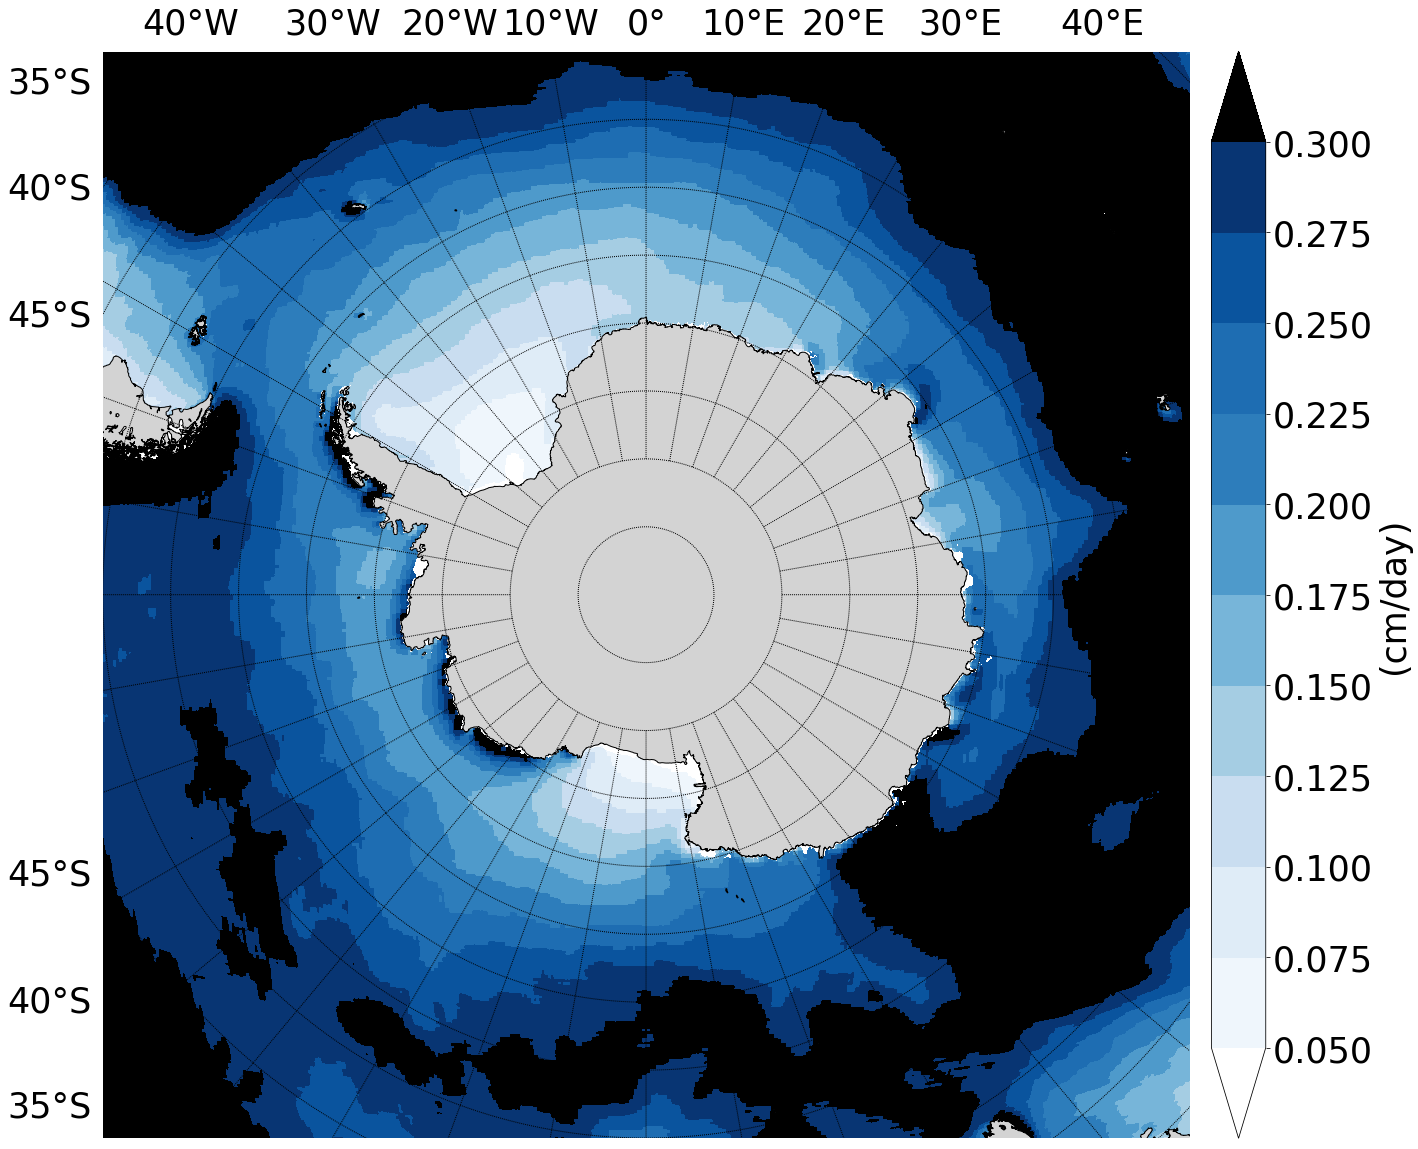

In [17]:
nice_cmap= nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap)
#nice_levels = [0.00001*3600*24*100/997,0.000012*3600*24*100/997,0.000014*3600*24*100/997,0.000016*3600*24*100/997,\
               #0.000018*3600*24*100/997,0.00002*3600*24*100/997,0.000024*3600*24*100/997,0.000026*3600*24*100/997,\
               #0.000028*3600*24*100/997,0.00003*3600*24*100/997,0.000032*3600*24*100/997]
nice_levels = [0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='white')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,t479,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('black')
CP.cmap.set_under('white')


#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)

In [18]:
di = t489 - t479

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'spacing'


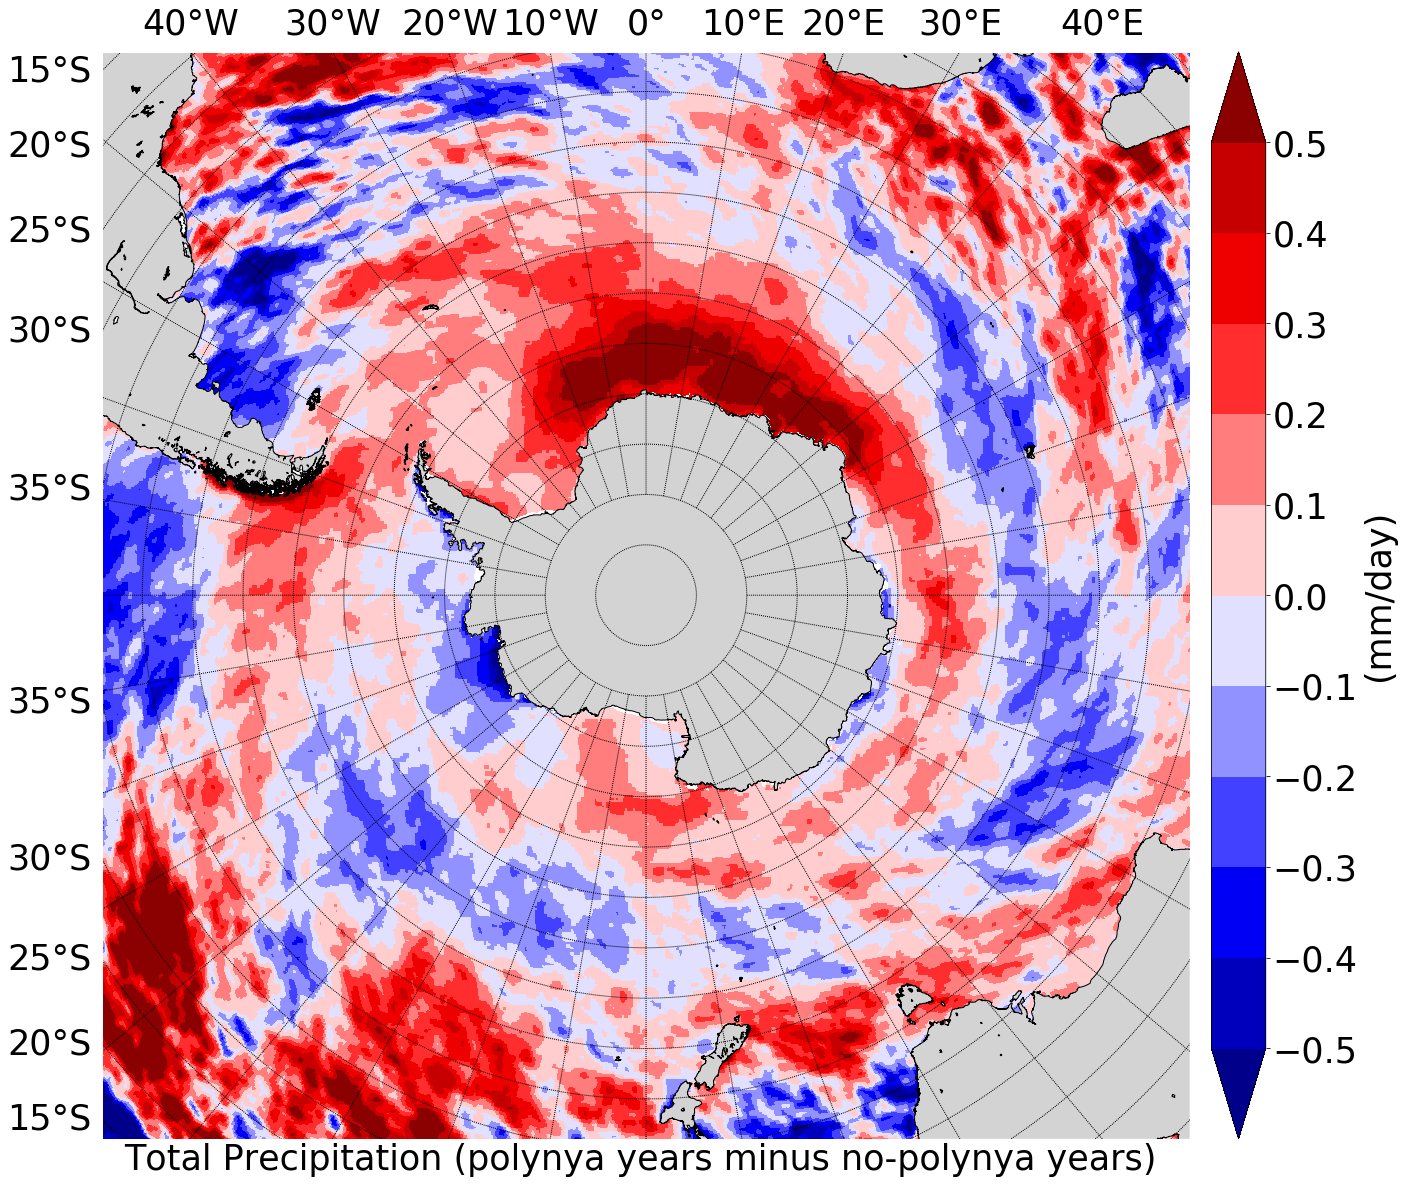

In [19]:
nice_cmap=plt.get_cmap('seismic')
lev_cmap = nice_cmap([40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
                      200,210,220])
new_cmap = cols.ListedColormap(lev_cmap,"seismic")
#nice_levels = [0.00001*3600*24*100/997,0.000012*3600*24*100/997,0.000014*3600*24*100/997,0.000016*3600*24*100/997,\
               #0.000018*3600*24*100/997,0.00002*3600*24*100/997,0.000024*3600*24*100/997,0.000026*3600*24*100/997,\
               #0.000028*3600*24*100/997,0.00003*3600*24*100/997,0.000032*3600*24*100/997]
nice_levels = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 12000000,height = 12000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='white')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,di*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')

plt.xlabel("Total Precipitation (polynya years minus no-polynya years) ",**my_font)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(mm/day)', **my_font)
plt.savefig("seaiceiee.png",bbox_inches='tight')

In [20]:
PE = np.loadtxt("resultrainsnow.out")

In [21]:
d4 = PE.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

In [22]:
PE = np.convolve(dmean, np.ones((5,))/5, mode='valid')

In [23]:
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'spacing'


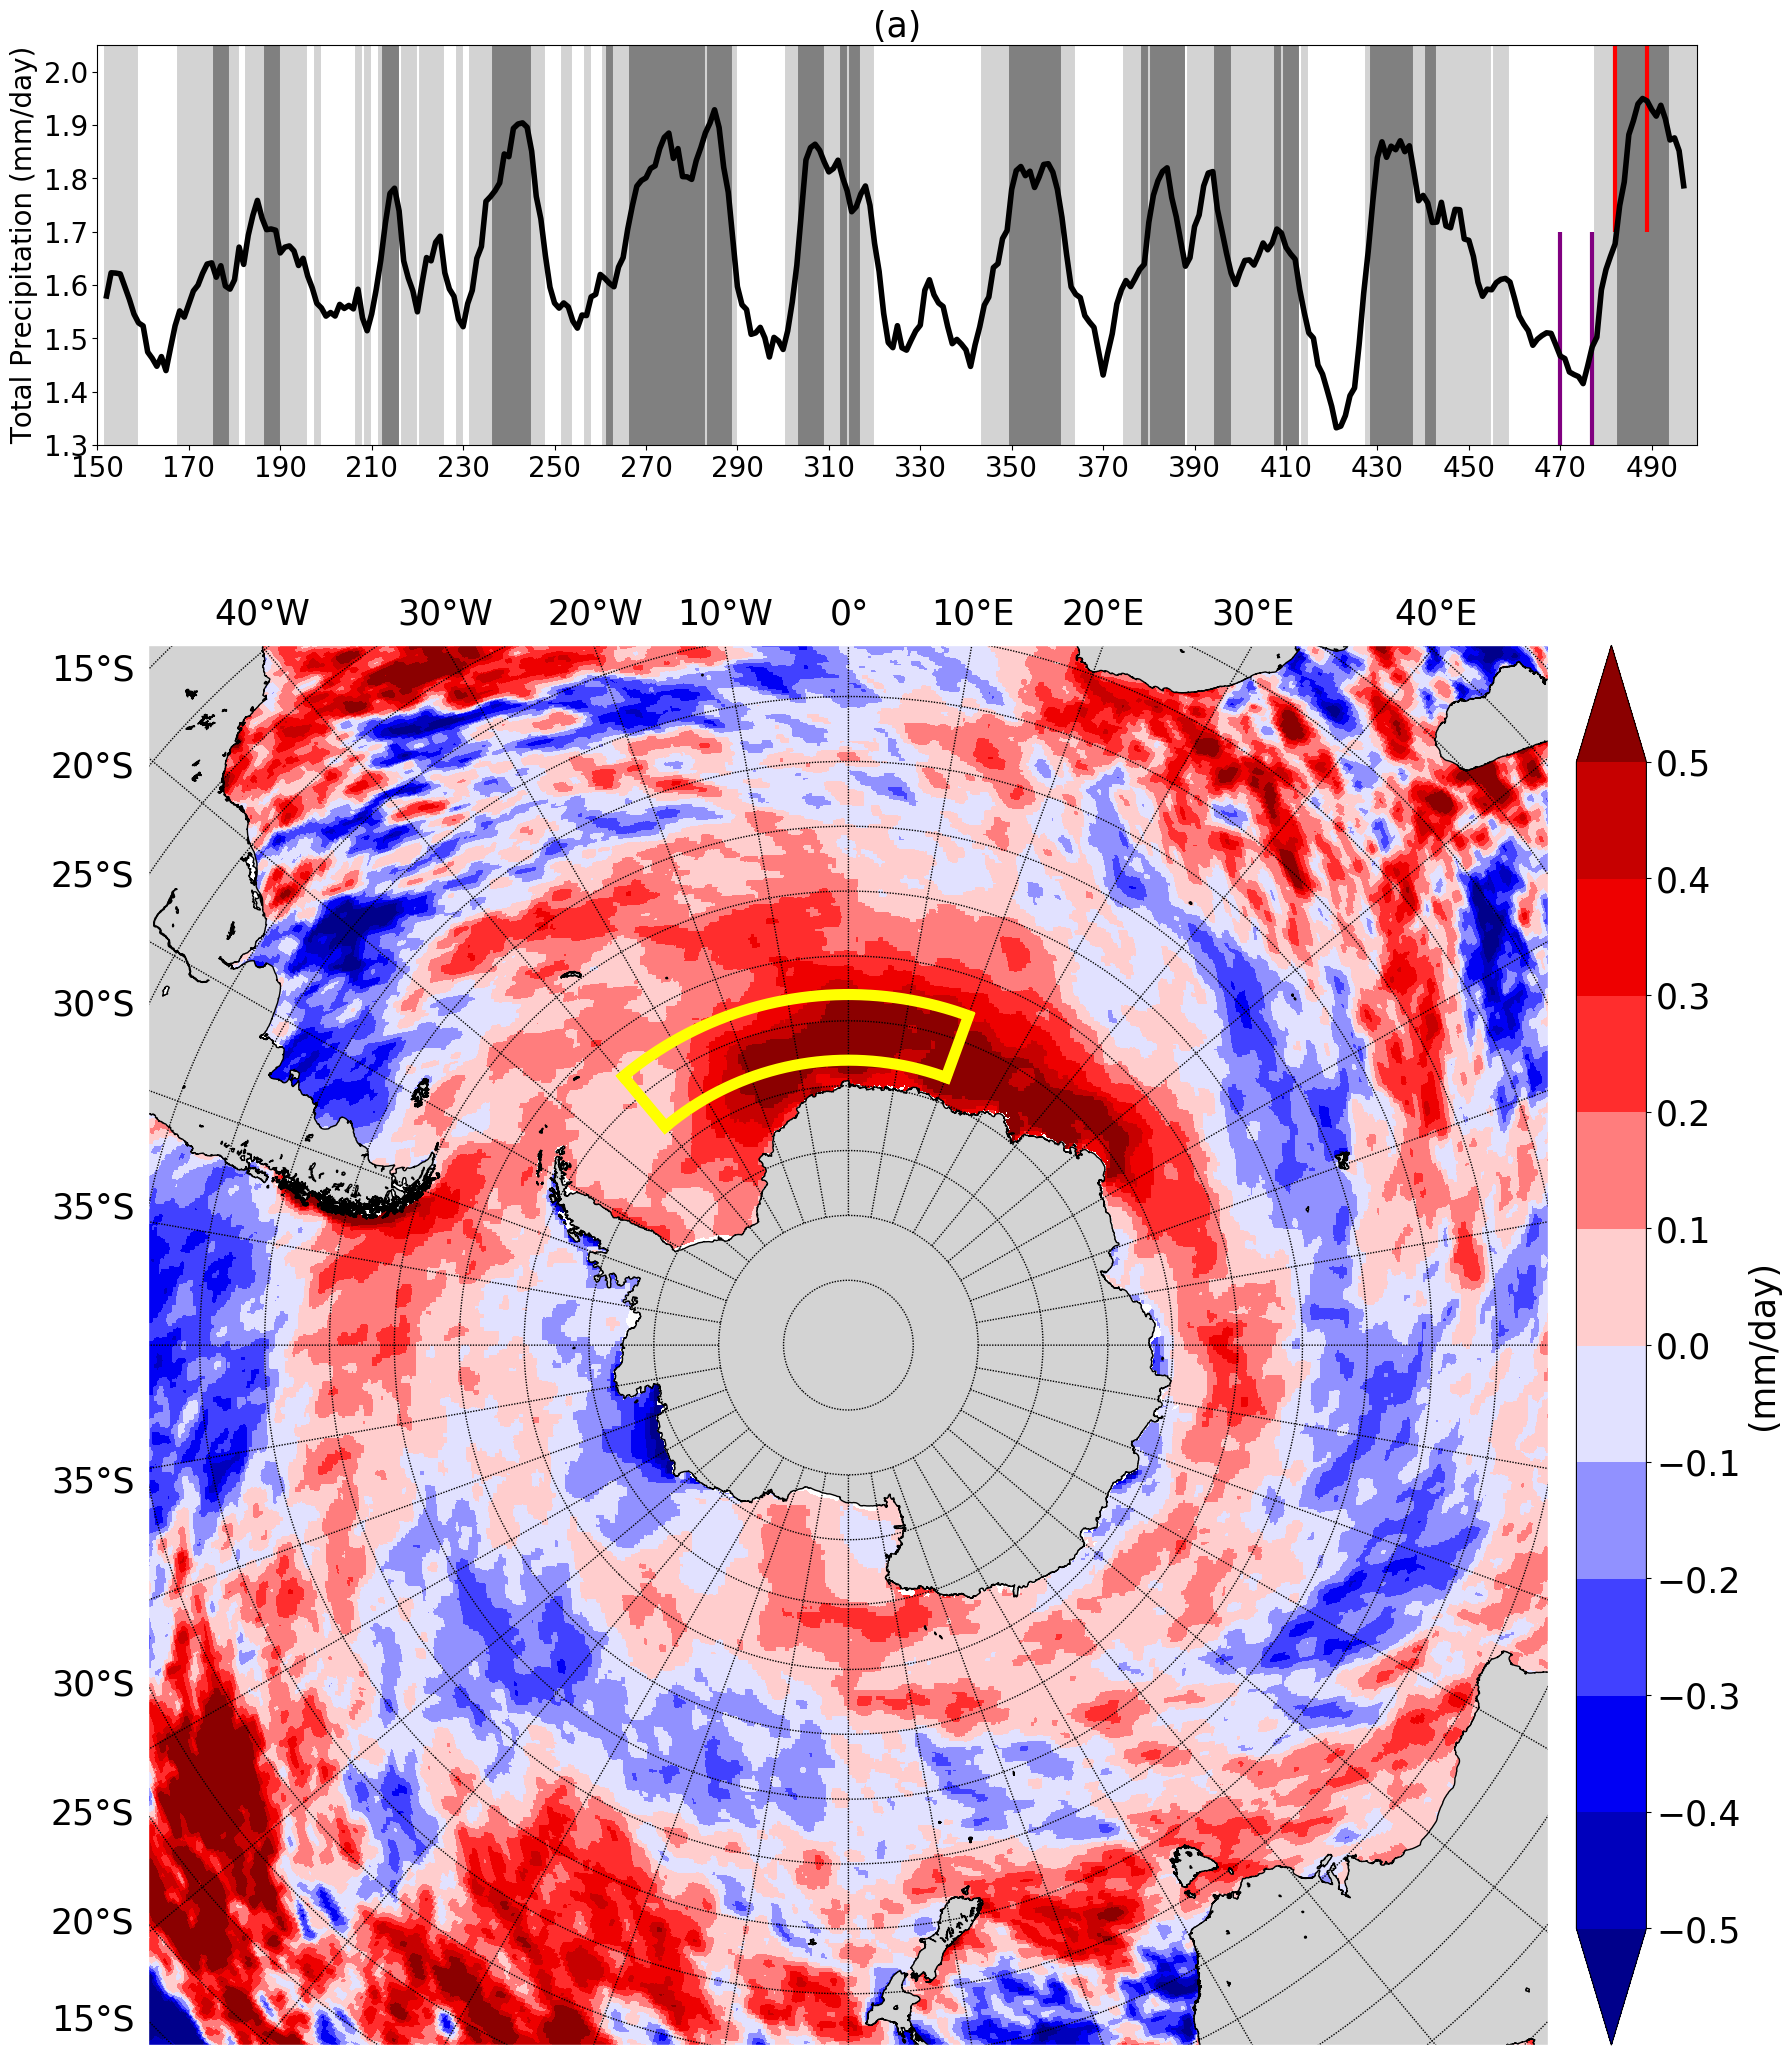

In [28]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'20'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(2,348,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[],ylim=(1.3,2.0))

ax1.plot(t,PE*10,'black',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 1.3,2.05, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 1.3,2.05, colors = "grey",linewidth=5)
plt.ylabel('Total Precipitation (mm/day)',**my_font)
plt.axis("tight")

#plt.title('(a)', fontsize=25)
plt.vlines(332, 1.7,2.05, colors = "red",linewidth=3)
plt.vlines(339, 1.7,2.05, colors = "red",linewidth=3)

plt.vlines(320, 1.3,1.7, colors = "purple",linewidth=3)
plt.vlines(327, 1.3,1.7, colors = "purple",linewidth=3)
ax1.set(ylim=(1.3,2.05),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
plt.title('(a)', fontsize=25)
#############################
#plt.title('(c)', fontsize=25)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.7],
                    xticklabels=[])
nice_cmap=plt.get_cmap('seismic')
lev_cmap = nice_cmap([40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
                      200,210,220])
new_cmap = cols.ListedColormap(lev_cmap,"seismic")
#nice_levels = [0.00001*3600*24*100/997,0.000012*3600*24*100/997,0.000014*3600*24*100/997,0.000016*3600*24*100/997,\
               #0.000018*3600*24*100/997,0.00002*3600*24*100/997,0.000024*3600*24*100/997,0.000026*3600*24*100/997,\
               #0.000028*3600*24*100/997,0.00003*3600*24*100/997,0.000032*3600*24*100/997]
nice_levels = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************


my_font = {'fontname':'Cambria', 'size':'25'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 12000000,height = 12000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='white')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,di*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')

x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=8)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=8)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=8)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=8)

#plt.xlabel("(b) Total Precipitation (polynya years minus no-polynya years) ",**my_font)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=25) 
cbar.set_label('(mm/day)', **my_font)
#plt.title('(b)', fontsize=25)
plt.savefig("seaiceiee.png",bbox_inches='tight')

In [27]:
# 63-68,,, 
lont2 = lont[247:365,1300]
latt2 = latt[247:365,1300]
lont3 = lont[247:365,700]
latt3 = latt[247:365,700]
lont4 = lont[247,700:1300]
latt4 = latt[247,700:1300]
lont5 = lont[365,700:1300]
latt5 = latt[365,700:1300]